In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
textdata = pickle.load(open('extractedData.p','rb'))

In [4]:
year = [i.split("-")[0] for i in textdata['date']]
textdata['year'] = year

In [5]:
len(textdata['year'])

675

# number of papers w.r.t year

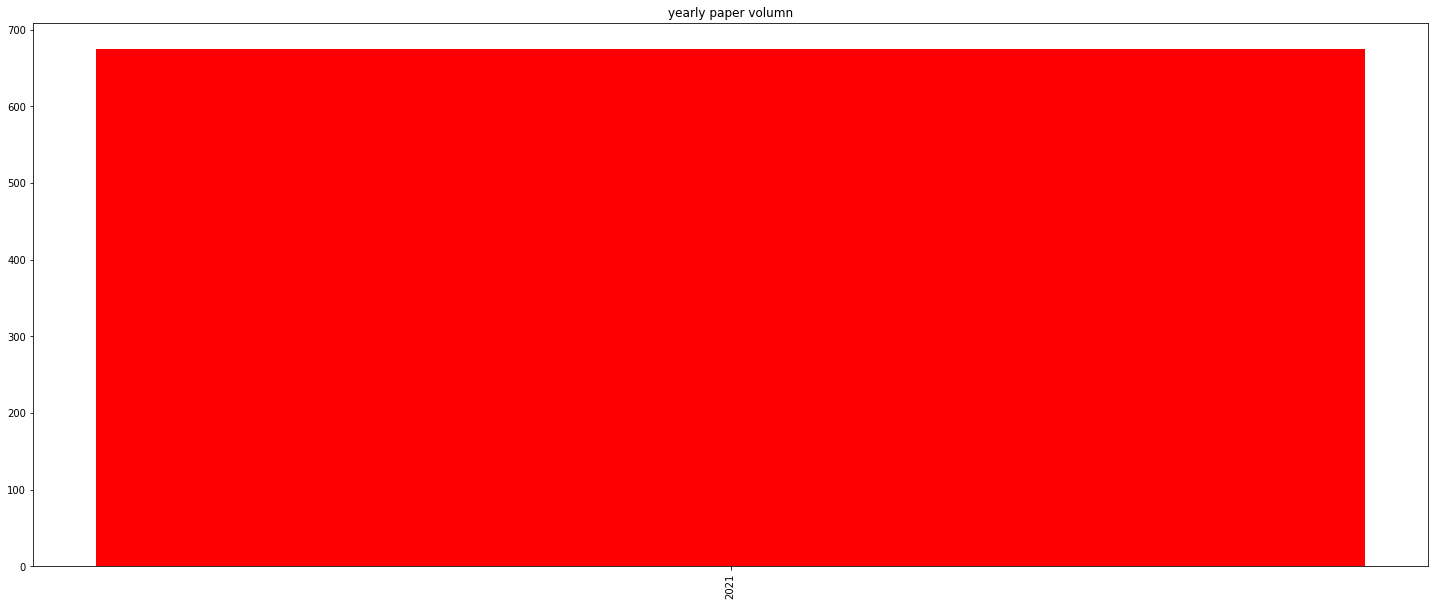

In [6]:
x1=textdata['year'].value_counts().sort_index().index
x1=[int(i) for i in x1]
y1=textdata['year'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(x1,rotation=90,size=10)
ax.set_title("yearly paper volumn")
plt.show()

# number of papers w.r.t year (last 30 year)

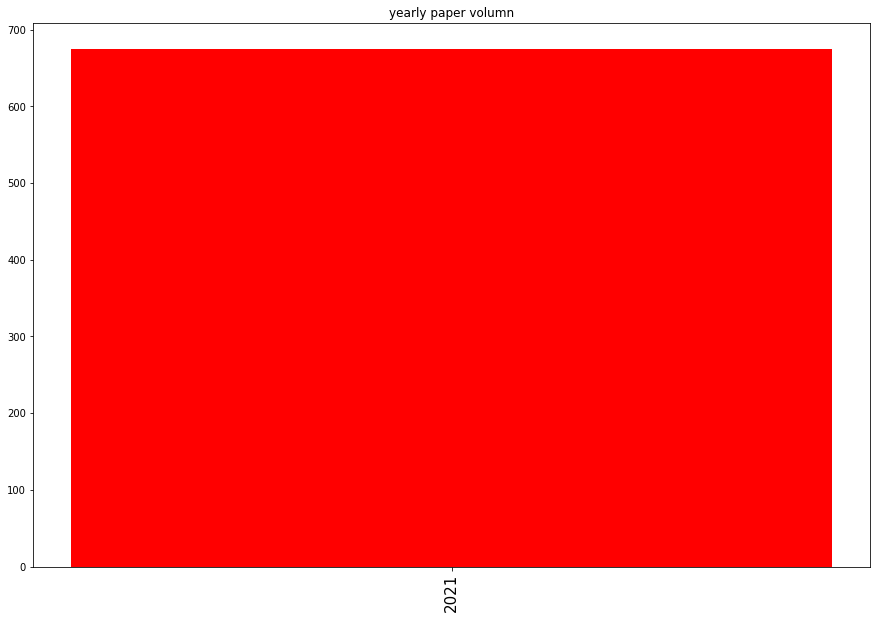

In [7]:
x1=textdata['year'].value_counts().sort_index().index[-30:]
x1=[int(i) for i in x1]
y1=textdata['year'].value_counts().sort_index().values[-30:]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(x1,rotation=90,size=15)
ax.set_title("yearly paper volumn")
plt.show()

# top 15 journals w.r.t number of papers

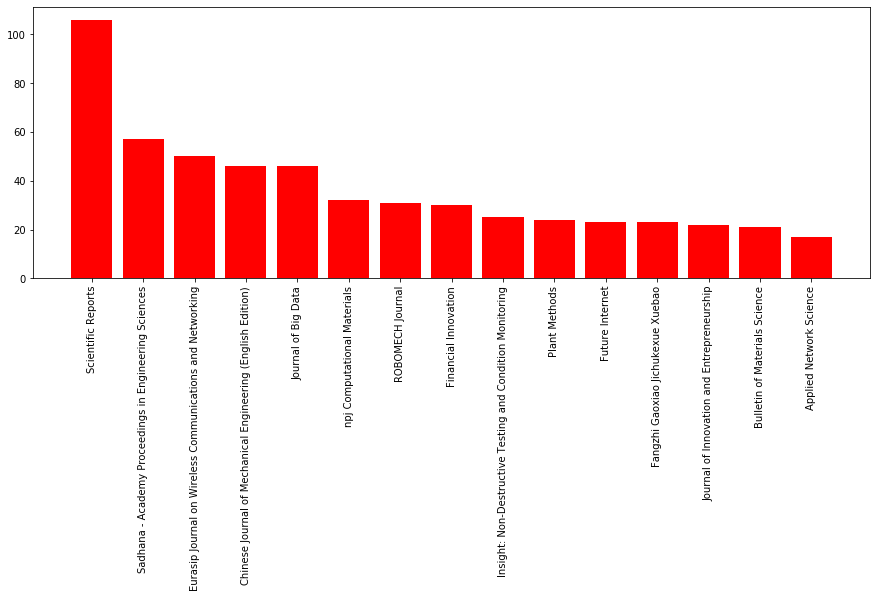

In [8]:
y1=textdata['journal_or_book_name'].value_counts().values[:15]
x1=range(len(y1))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(textdata['journal_or_book_name'].value_counts()[:15].index,rotation=90,size=10)
plt.show()

# top 10 journals w.r.t total number of citations

In [9]:
temp = textdata.groupby(['journal_or_book_name'])['citation_count'].mean()
temp = pd.DataFrame(temp.sort_values(ascending=False))
temp[:10]

,citation_count
journal_or_book_name,
INFORMS Journal on Computing,2.000000
Applied Network Science,1.000000
BMC Health Services Research,1.000000
BMC Veterinary Research,1.000000
Insight: Non-Destructive Testing and Condition Monitoring,1.000000
ROBOMECH Journal,0.806452
Chinese Journal of Mechanical Engineering (English Edition),0.478261
Energy Reports,0.166667
BMC Oral Health,0.000000


# top 10 journals w.r.t average number of citations

In [10]:
temp = textdata.groupby(['journal_or_book_name'])['citation_count'].sum()
temp = pd.DataFrame(temp.sort_values(ascending=False))
temp[:10]

,citation_count
journal_or_book_name,
INFORMS Journal on Computing,34.0
ROBOMECH Journal,25.0
Insight: Non-Destructive Testing and Condition Monitoring,25.0
Chinese Journal of Mechanical Engineering (English Edition),22.0
Applied Network Science,17.0
BMC Health Services Research,7.0
BMC Veterinary Research,7.0
Energy Reports,1.0
BMC Oral Health,0.0


In [11]:
authors = {}
for idx,author_list in enumerate(textdata['authors']):
    for author in author_list:
        if author in authors:
            if len(author)>1:
                authors[author]['num_papers']+=1
                authors[author]['total_citations']+=textdata['citation_count'][idx]
                if textdata['citation_count'][idx]>authors[author]['citation']:
                    authors[author]['most_cited_paper'] = textdata['title'][idx]
        else:
            if len(author)>1:
                authors[author] = {'num_papers':1,'total_citations':textdata['citation_count'][idx],\
                                   "most_cited_paper":textdata['title'][idx],'citation':textdata['citation_count'][idx]}
authors = pd.DataFrame(authors).T

In [12]:
authors['mean_citations'] = authors['total_citations']/authors['num_papers']

# top 10 authors w.r.t total numebr of papers

In [13]:
authors.sort_values(['num_papers'],ascending=0)[:10]

,num_papers,total_citations,most_cited_paper,citation,mean_citations
Agrawal P.,25,0,"Energy-efficient scheduling: classification, b...",0,0
Wang Y.,25,25,Remaining useful life prediction of rolling be...,1,1
Habibian S.,25,25,Design and implementation of a maxi-sized mobi...,1,1
Zhou H.,24,0,Aerodynamic Characteristics of Isolated Loaded...,0,0
Jayakody H.,24,0,A generalised approach for high-throughput ins...,0,0
Zannou A.,23,0,SIoT: A new strategy to improve the network li...,0,0
Zhang Y.,23,0,Tensile electrical properties of flexible sens...,0,0
Ulhoi J.P.,22,0,From innovation-as-usual towards unusual innov...,0,0
Duan Z.,22,22,Milling Force Model for Aviation Aluminum Allo...,1,1
Bose S.,21,0,Novel approach in experimental and statistical...,0,0


# top 10 authors w.r.t total numebr of citations

In [14]:
authors.sort_values(['total_citations'],ascending=0)[:10]

,num_papers,total_citations,most_cited_paper,citation,mean_citations
Doulabi H.H.,17,34,Exploiting the structure of two-stage robust o...,2,2
Habibian S.,25,25,Design and implementation of a maxi-sized mobi...,1,1
Wang Y.,25,25,Remaining useful life prediction of rolling be...,1,1
Duan Z.,22,22,Milling Force Model for Aviation Aluminum Allo...,1,1
Roy S.,17,17,Towards Dynamic lockdown strategies controllin...,1,1
Bradley J.,7,7,Increasing adoption rates at animal shelters: ...,1,1
Alfiero S.,7,7,Intellectual capital-based performance improve...,1,1
Liu Y.,4,1,A multidimensional outlook to energy investmen...,0,0.25
Gunji B.M.,1,0,Optimal disassembly sequence generation and di...,0,0
Tian X.,14,0,Descriptor selection for predicting interfacia...,0,0


# top 10 authors w.r.t average numebr of citations

In [15]:
authors.sort_values(['mean_citations'],ascending=0)[:10]

,num_papers,total_citations,most_cited_paper,citation,mean_citations
Doulabi H.H.,17,34,Exploiting the structure of two-stage robust o...,2,2
Habibian S.,25,25,Design and implementation of a maxi-sized mobi...,1,1
Bradley J.,7,7,Increasing adoption rates at animal shelters: ...,1,1
Wang Y.,25,25,Remaining useful life prediction of rolling be...,1,1
Alfiero S.,7,7,Intellectual capital-based performance improve...,1,1
Duan Z.,22,22,Milling Force Model for Aviation Aluminum Allo...,1,1
Roy S.,17,17,Towards Dynamic lockdown strategies controllin...,1,1
Liu Y.,4,1,A multidimensional outlook to energy investmen...,0,0.25
Gunji B.M.,1,0,Optimal disassembly sequence generation and di...,0,0
Tian X.,14,0,Descriptor selection for predicting interfacia...,0,0


In [16]:
## removing authors only have one paper
authors[authors['num_papers']>1].sort_values(['mean_citations'],ascending=0)[:10]

,num_papers,total_citations,most_cited_paper,citation,mean_citations
Doulabi H.H.,17,34,Exploiting the structure of two-stage robust o...,2,2
Roy S.,17,17,Towards Dynamic lockdown strategies controllin...,1,1
Bradley J.,7,7,Increasing adoption rates at animal shelters: ...,1,1
Habibian S.,25,25,Design and implementation of a maxi-sized mobi...,1,1
Alfiero S.,7,7,Intellectual capital-based performance improve...,1,1
Wang Y.,25,25,Remaining useful life prediction of rolling be...,1,1
Duan Z.,22,22,Milling Force Model for Aviation Aluminum Allo...,1,1
Liu Y.,4,1,A multidimensional outlook to energy investmen...,0,0.25
Tian X.,14,0,Descriptor selection for predicting interfacia...,0,0
Mirghaderi S.D.,20,0,Application of meta-heuristic algorithm for mu...,0,0


# ... to be continued